In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from torchvision import transforms
import torchvision

import os, time
from tqdm import tqdm

from datapreprocessing import *

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
dataset = HandWritingLinesDataset()
(dataset[0]["image"], dataset[0]["text"])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1539/1539 [00:33<00:00, 45.89it/s]


(tensor([[255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         ...,
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.],
         [255., 255., 255.,  ..., 255., 255., 255.]]),
 'A MOVE to stop Mr. Gaitskell from')

In [1]:
unique_characters = [' ', '!', '\"', '#', '&', '\'', '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
print(unique_characters)

[' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [2]:
char2id = {}
id2char = {}

for id, character in enumerate(unique_characters):
    char2id[character] = id + 1
    id2char[id + 1] = character

print(char2id)
print(id2char)

{' ': 1, '!': 2, '"': 3, '#': 4, '&': 5, "'": 6, '(': 7, ')': 8, '*': 9, '+': 10, ',': 11, '-': 12, '.': 13, '/': 14, '0': 15, '1': 16, '2': 17, '3': 18, '4': 19, '5': 20, '6': 21, '7': 22, '8': 23, '9': 24, ':': 25, ';': 26, '?': 27, 'A': 28, 'B': 29, 'C': 30, 'D': 31, 'E': 32, 'F': 33, 'G': 34, 'H': 35, 'I': 36, 'J': 37, 'K': 38, 'L': 39, 'M': 40, 'N': 41, 'O': 42, 'P': 43, 'Q': 44, 'R': 45, 'S': 46, 'T': 47, 'U': 48, 'V': 49, 'W': 50, 'X': 51, 'Y': 52, 'Z': 53, 'a': 54, 'b': 55, 'c': 56, 'd': 57, 'e': 58, 'f': 59, 'g': 60, 'h': 61, 'i': 62, 'j': 63, 'k': 64, 'l': 65, 'm': 66, 'n': 67, 'o': 68, 'p': 69, 'q': 70, 'r': 71, 's': 72, 't': 73, 'u': 74, 'v': 75, 'w': 76, 'x': 77, 'y': 78, 'z': 79}
{1: ' ', 2: '!', 3: '"', 4: '#', 5: '&', 6: "'", 7: '(', 8: ')', 9: '*', 10: '+', 11: ',', 12: '-', 13: '.', 14: '/', 15: '0', 16: '1', 17: '2', 18: '3', 19: '4', 20: '5', 21: '6', 22: '7', 23: '8', 24: '9', 25: ':', 26: ';', 27: '?', 28: 'A', 29: 'B', 30: 'C', 31: 'D', 32: 'E', 33: 'F', 34: 'G',

In [57]:
import torchvision

resnet = torchvision.models.()
for param in resnet.state_dict():
    print(param, "\t", resnet.state_dict()[param].size())

AttributeError: module 'torchvision.models' has no attribute 'Inception'

In [52]:
import torch

image = torch.randn(1, 3, 1000, 1000)
image.size()

torch.Size([1, 3, 1000, 1000])

In [54]:
output = resnet(image)
output

InceptionOutputs(logits=tensor([[ 7.1181e-01,  2.0966e+00,  8.0506e-02,  6.7979e-01, -3.0642e+00,
         -2.7178e+00,  1.7179e+00, -2.1744e+00,  6.3608e-02, -1.6600e+00,
          6.4885e-01, -1.7523e+00, -1.2759e+00, -7.7600e-02,  5.8925e-01,
         -2.5248e+00, -1.3847e+00,  9.6371e-01, -3.3558e+00, -1.5313e+00,
         -7.2491e+00, -1.5527e+00, -1.5231e+00, -9.4576e-01, -7.2204e-01,
         -1.1110e+00, -4.9294e-01, -9.3774e-01, -1.5550e+00,  1.5193e-01,
         -3.3585e+00, -6.0354e-01,  6.1916e-01,  2.5428e+00, -2.1704e+00,
         -3.2187e+00, -2.5793e+00, -1.8326e+00, -3.1908e+00,  1.7104e+00,
          8.3810e-01,  3.6186e+00,  1.3774e+00,  9.5931e-01, -2.0030e+00,
         -1.7489e+00,  3.4056e-01, -1.2038e+00, -6.2425e-01,  2.7846e-01,
         -2.9920e-02,  1.4093e-01,  2.3937e-01,  2.0641e+00, -1.9313e+00,
         -1.5009e+00,  2.4792e+00, -1.8315e+00,  1.9444e+00, -8.4584e-01,
          2.5872e+00,  3.6169e-01,  1.3617e+00, -4.8091e+00, -4.7920e-01,
         -1.70

In [56]:
output.logits.size()

torch.Size([1, 1000])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training Examples: 93160
Testing Examples:  4096
Training Mean:     192
Training Std:      81
to


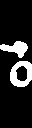

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 

In [60]:
%load_ext autoreload
%autoreload 2

import torch
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torchvision.transforms.functional as TF
from torchvision import transforms

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import sys

import config
from model import Image2TextNet
from dataset import HandWritingLinesDataset
from preprocessing import Rescale, GreyscaleToBlackAndWhite, TransposeImage, GaussianFiltering, AverageFiltering, MedianPool2d
import engine

transform = transforms.Compose([
    TransposeImage(),
    Rescale((config.IMAGE_H, config.IMAGE_W)),
])

train_dataset = HandWritingLinesDataset(train=True, transform=transform)
test_dataset = HandWritingLinesDataset(train=False, transform=transform)

data = next(iter(train_dataset))
mean, std = data["image"].mean(), data["image"].std()

transform = transforms.Compose([
    TransposeImage(),
    Rescale((config.IMAGE_H, config.IMAGE_W)),
    transforms.Normalize(mean=(mean,), std=(std,)),
#     AverageFiltering(channels=1, kernel_size=5),
    GaussianFiltering(channels=1, kernel_size=5, sigma=1),
    GreyscaleToBlackAndWhite(),
#     MedianPool2d(kernel_size=5, same=True),
])

train_dataset = HandWritingLinesDataset(train=True, transform=transform)
test_dataset = HandWritingLinesDataset(train=False, transform=transform)

train = DataLoader(train_dataset, batch_size=32)
test = DataLoader(test_dataset, batch_size=len(test_dataset))

print("Training Examples: %d" % (len(train_dataset)))
print("Testing Examples:  %d" % (len(test_dataset)))

print("Training Mean:     %d" % (mean))
print("Training Std:      %d" % (std))

k = 0
lim = 1
off = 1

def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img)
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

for bi, d in enumerate(train):
    inputs, targets = d["image"], d["text"]
    print(targets[off])
    imshow(inputs[off].numpy().reshape(config.IMAGE_H, config.IMAGE_W, 1) * 255)
    np.set_printoptions(threshold=sys.maxsize)
    print(inputs[off].numpy())
    np.set_printoptions(threshold=1000)
    
    k += 1
    if k == lim:
        break

In [39]:
import editdistance
type(editdistance.eval("djdfj", "skdfj"))

int

In [10]:
print('%s_%s@hotmail.com'%('harald','scheidl'))

harald_scheidl@hotmail.com
